# Ejercicio 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, probplot

In [2]:
casos_ruta_archivo = 'datos\casos_covid_bahia.csv'
camas_ruta = 'datos\camas_covid_bahia.csv'
df_casos = pd.read_csv(casos_ruta_archivo)
df_camas = pd.read_csv(camas_ruta)

In [10]:
df_casos

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


In [11]:
df_camas

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN


In [3]:
df_camas.columns

Index(['informeNumero', 'fecha', 'total_camas_hospitales',
       'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales',
       'camas_covid', 'camas_sospechosos_covid', 'camas_confirmados_covid',
       'porcentaje_ocupacion_camas_covid', 'uti_covid_totales',
       'uti_covid_ocupadas', 'respiradores_totales', 'respiradores_ocupados',
       'respiradores_covid_totales', 'respiradores_covid_ocupados',
       'total_camas_ucma', 'total_camas_ocupadas_ucma', 'sedes_ucma',
       'observaciones'],
      dtype='object')

## Histogramas de columnas

## DF_CAMAS

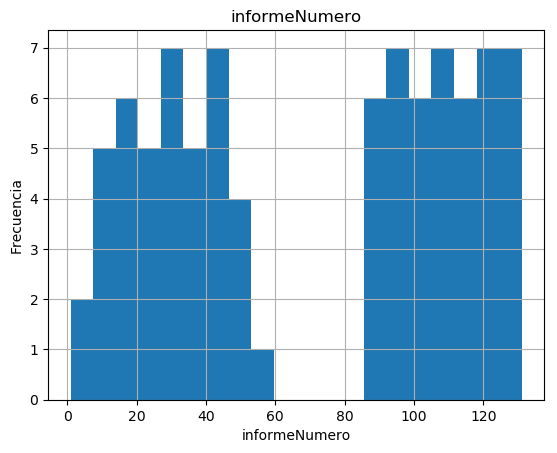

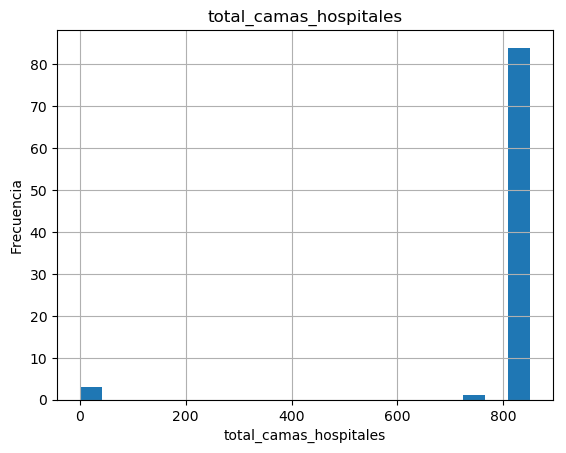

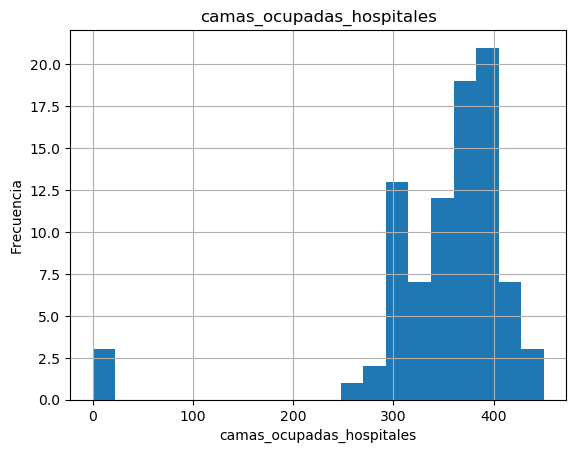

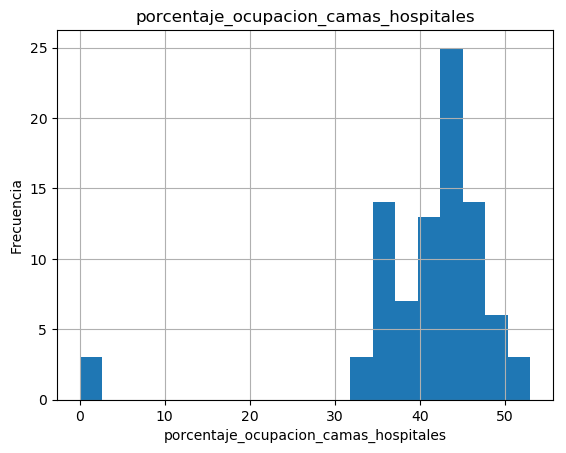

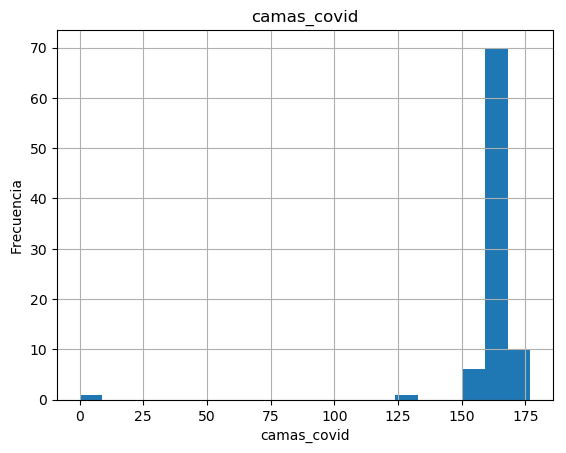

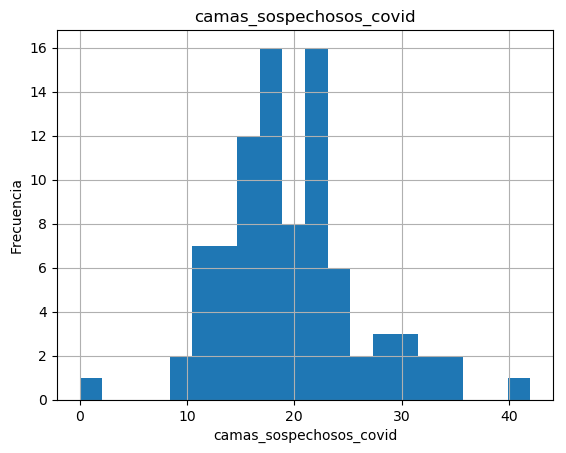

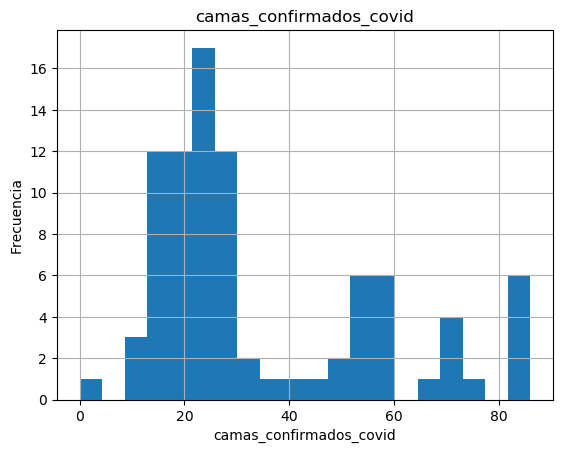

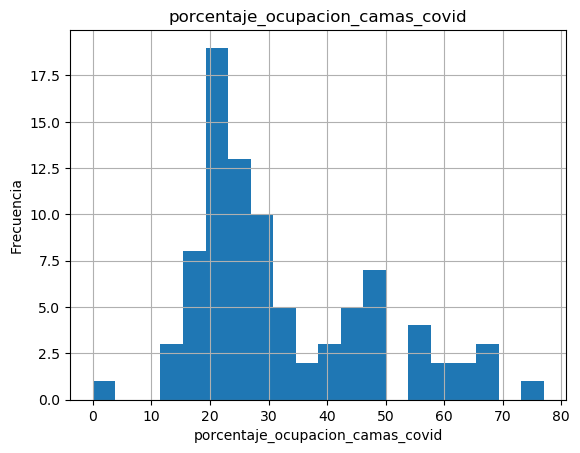

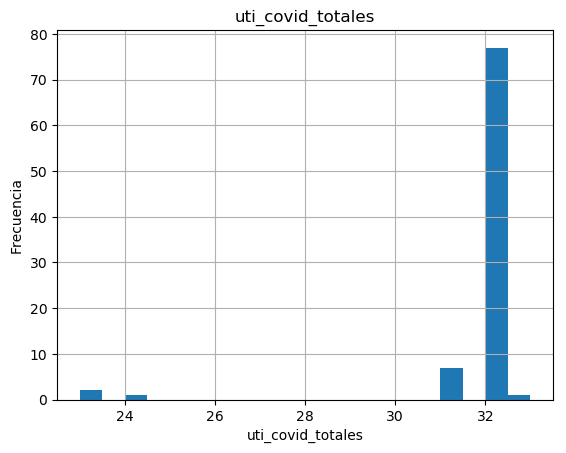

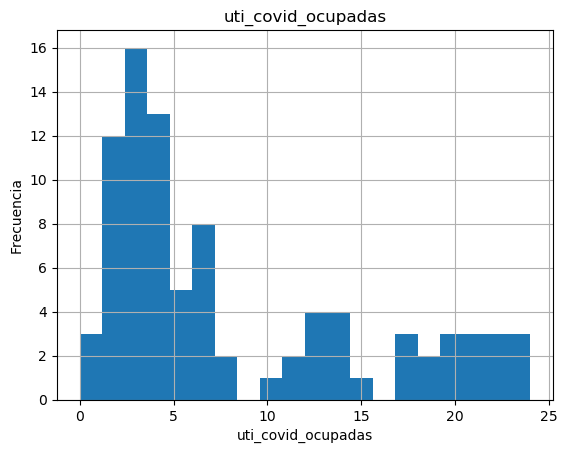

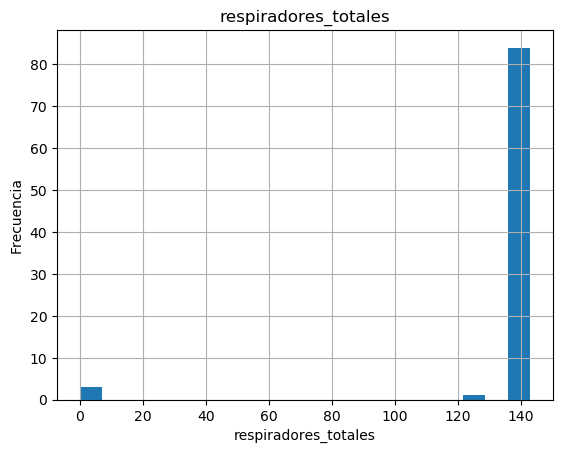

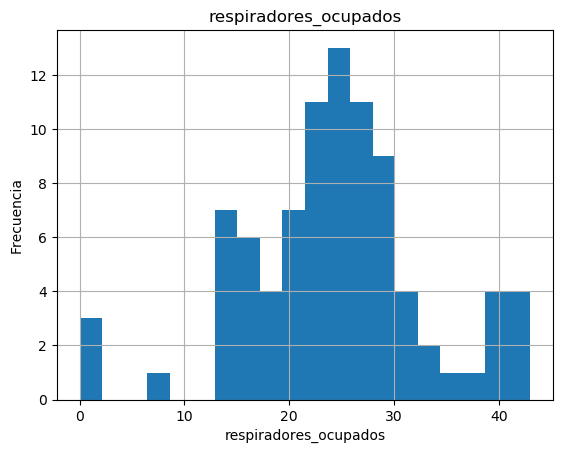

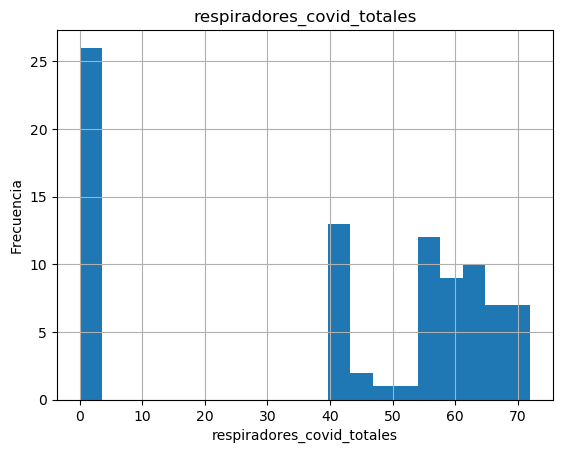

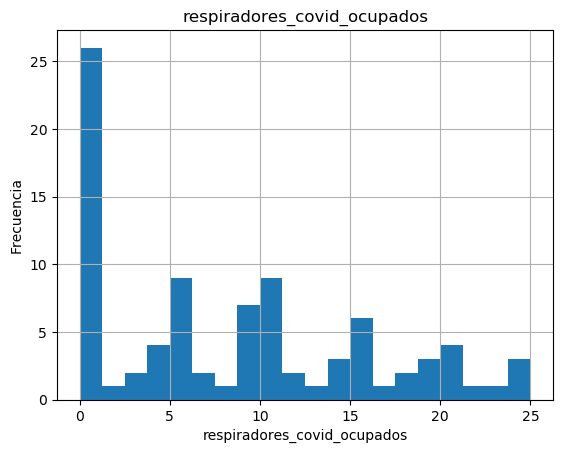

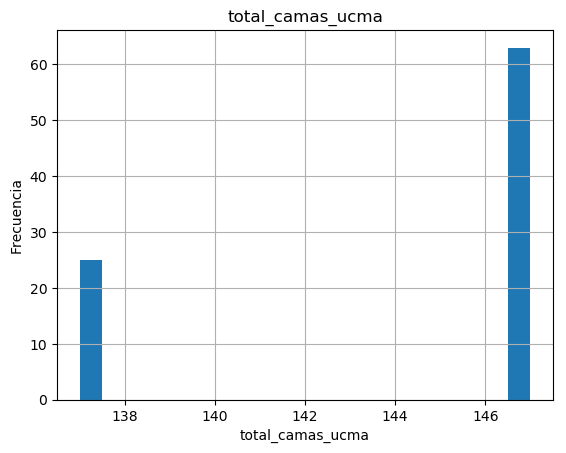

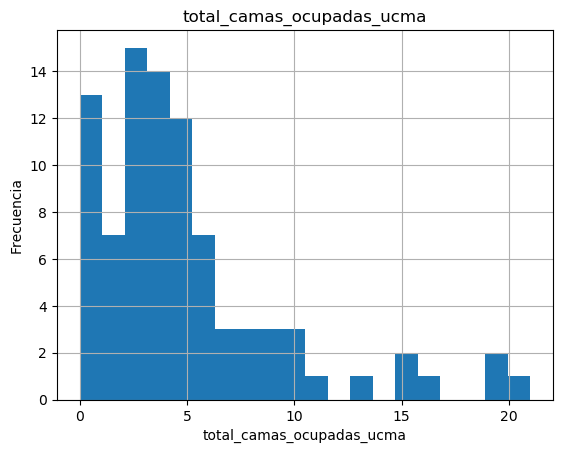

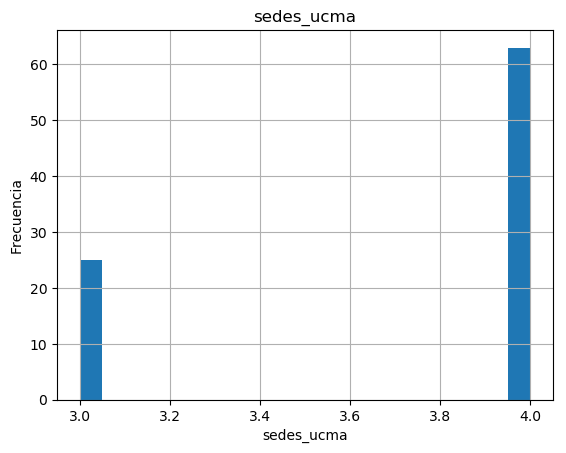

In [7]:
for d in df_camas.columns:
    if d in ['fecha', 'observaciones']:
        continue
    df_camas[d].plot(kind='hist', bins=20, title=d)
    plt.xlabel(d)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

## DF_CASOS

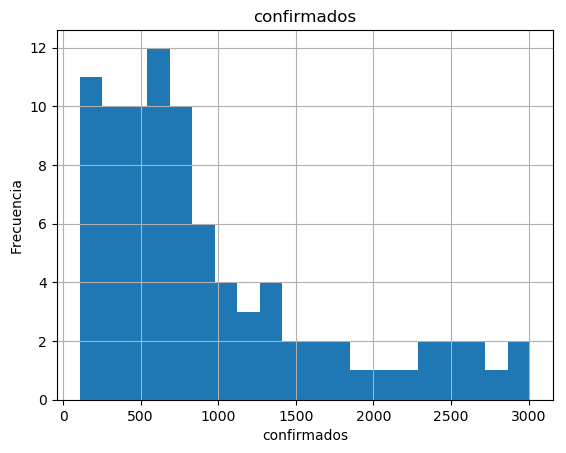

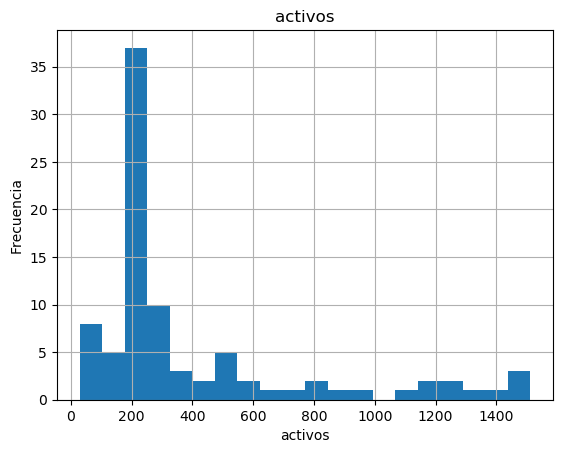

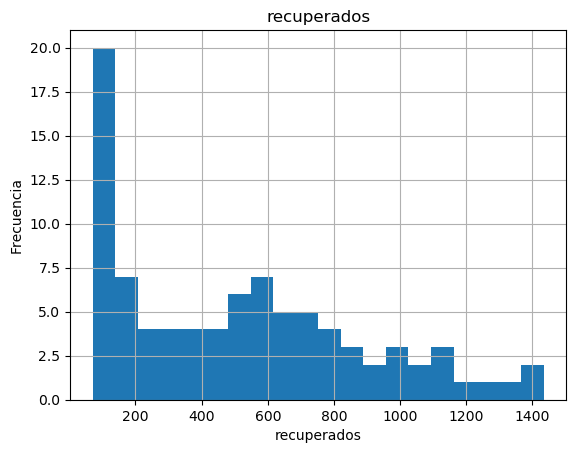

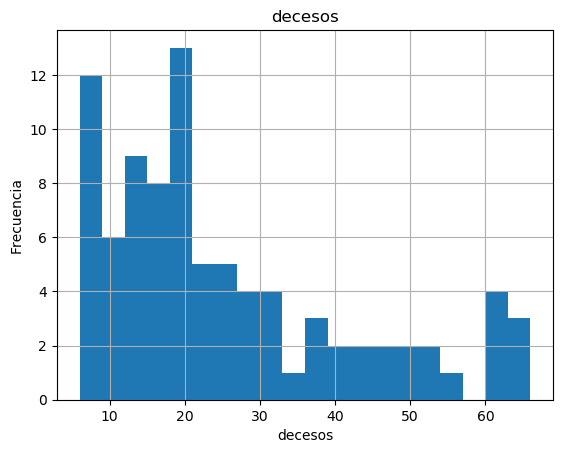

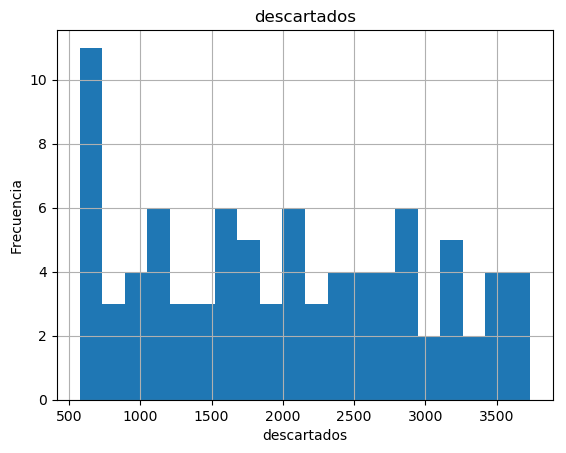

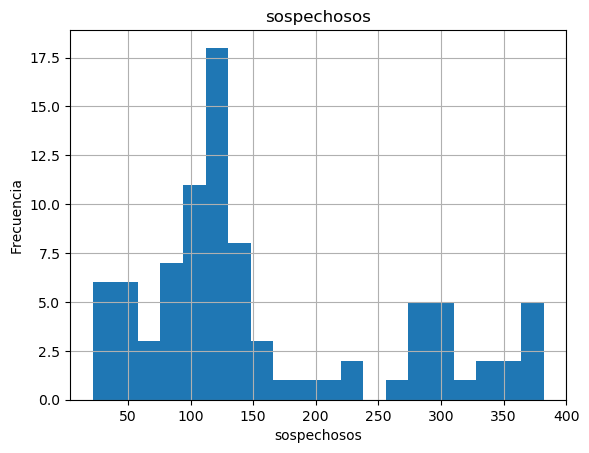

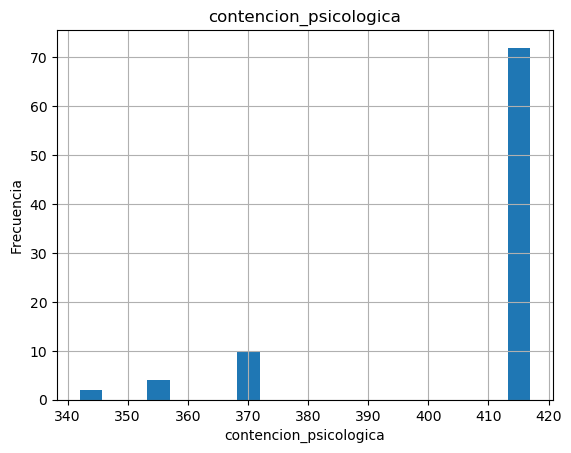

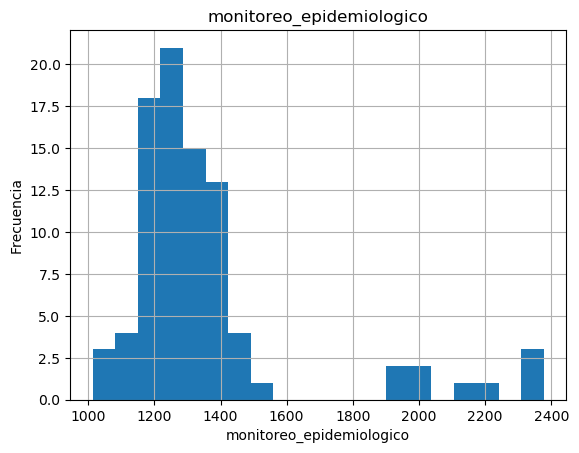

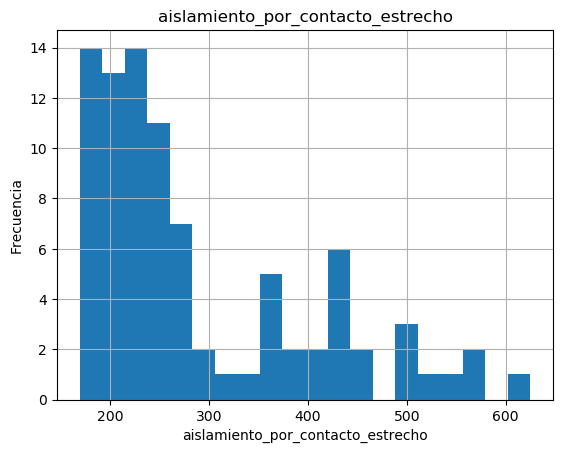

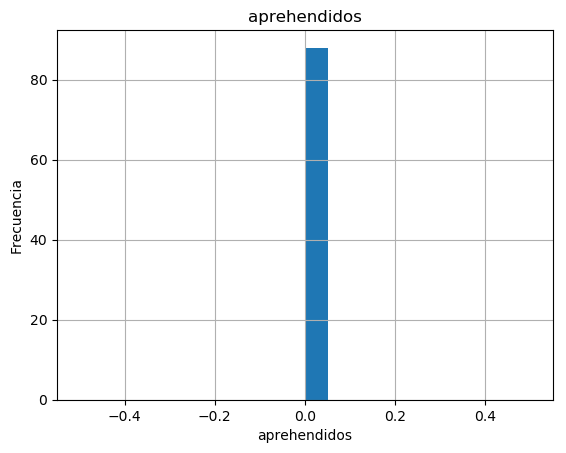

In [12]:
for d in df_casos.columns:
    if d in ['fecha', 'observaciones']:
        continue
    df_casos[d].plot(kind='hist', bins=20, title=d)
    plt.xlabel(d)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

## Test estadisticos para analizar normalidad

Pregunté al GPT que podría utilizar para analizar variables normales y me tiró estas opciones. Igualmente las variables que podría indicar que pueden tener estas opciones son: 

- monitoreo_epidemiológico
- activos
- confirmados

Más que nada por su histograma


📊 Columna: confirmados


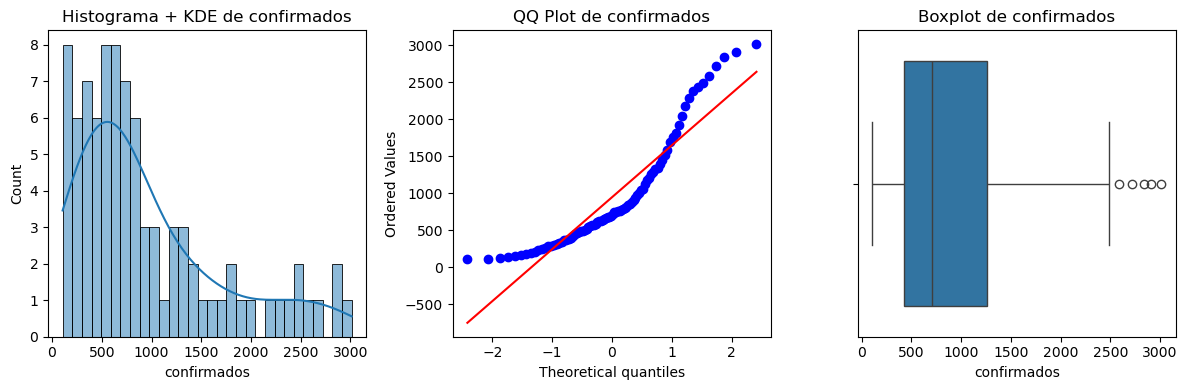

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00008
🧪 Anderson-Darling stat: 4.16976
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: activos


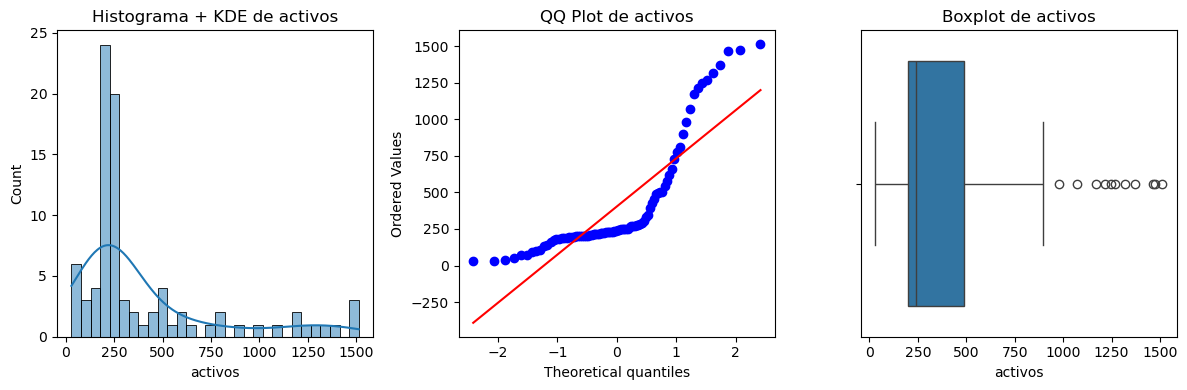

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00000
🧪 Anderson-Darling stat: 9.69531
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: recuperados


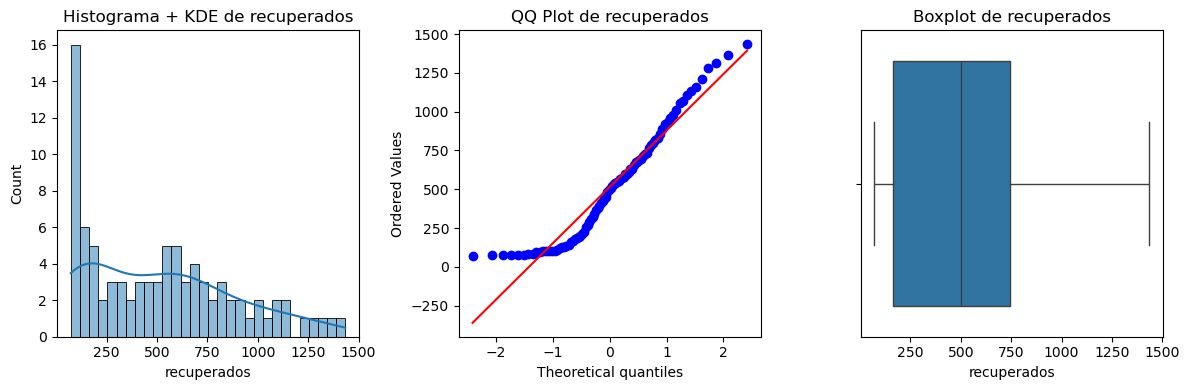

🧪 Shapiro-Wilk test: p-value = 0.00008
🧪 D’Agostino-Pearson test: p-value = 0.03433
🧪 Anderson-Darling stat: 1.75982
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: decesos


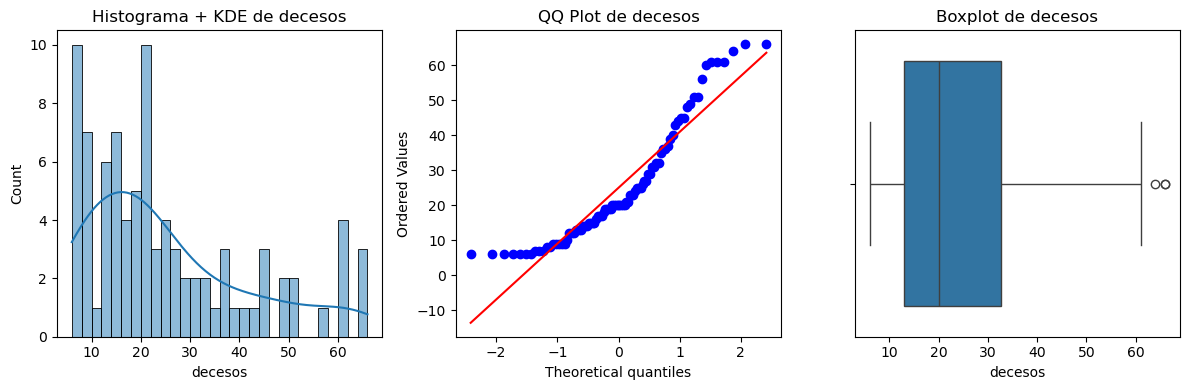

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00206
🧪 Anderson-Darling stat: 3.19442
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: descartados


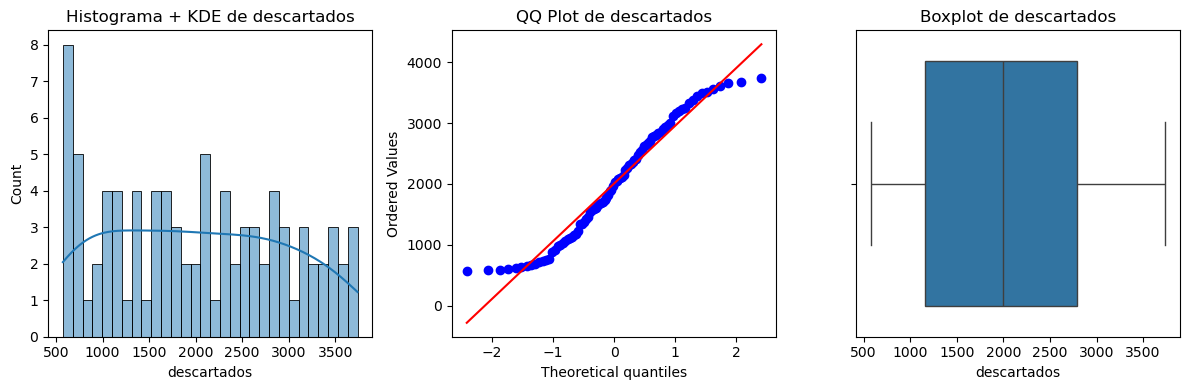

🧪 Shapiro-Wilk test: p-value = 0.00188
🧪 D’Agostino-Pearson test: p-value = 0.00000
🧪 Anderson-Darling stat: 1.02090
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: sospechosos


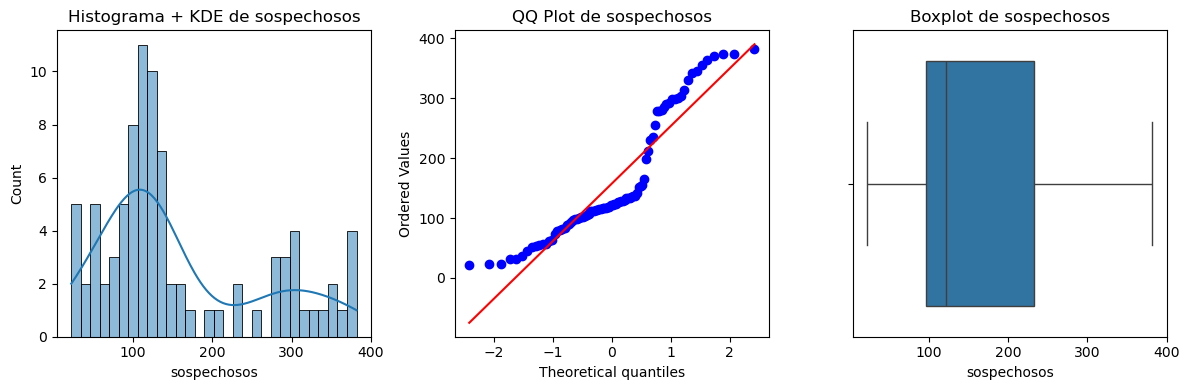

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00417
🧪 Anderson-Darling stat: 4.94820
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: contencion_psicologica


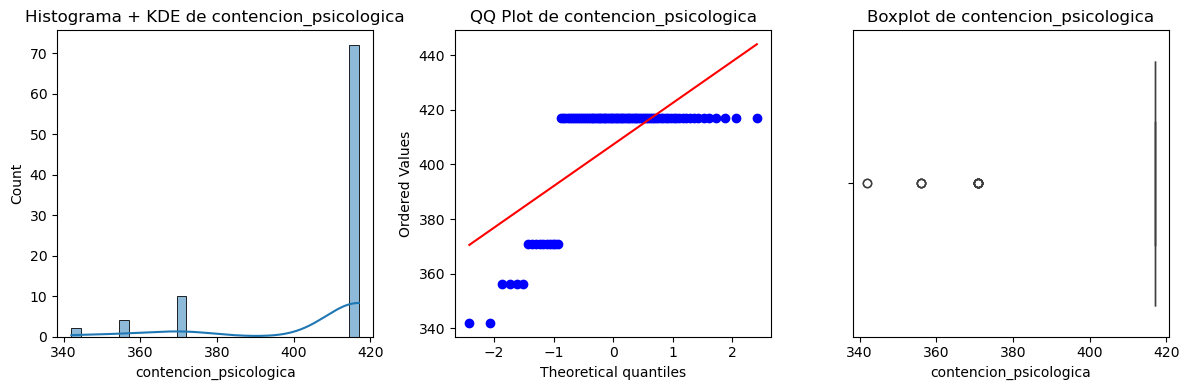

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00000
🧪 Anderson-Darling stat: 22.51648
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: monitoreo_epidemiologico


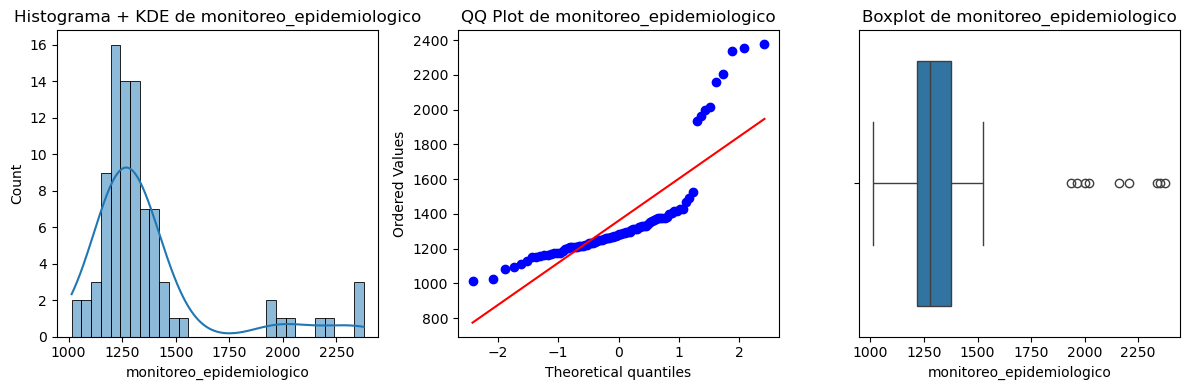

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00000
🧪 Anderson-Darling stat: 10.30719
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: aislamiento_por_contacto_estrecho


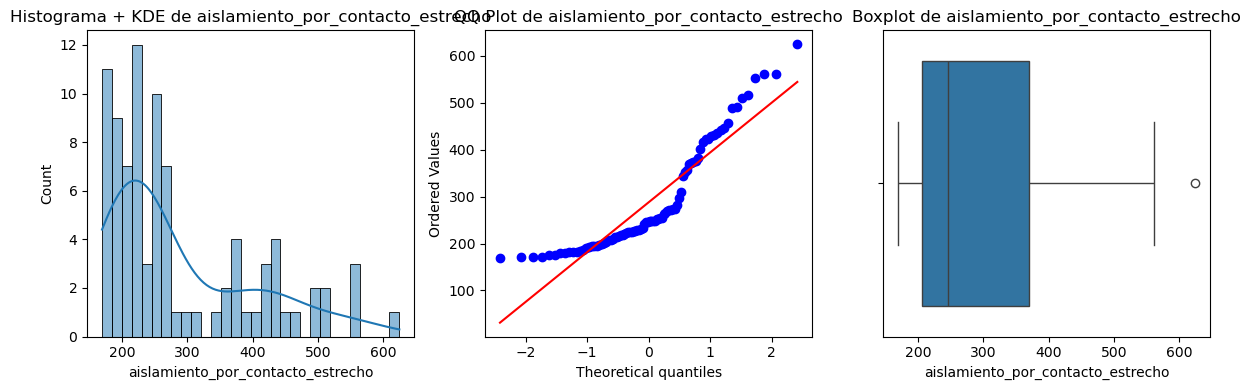

🧪 Shapiro-Wilk test: p-value = 0.00000
🧪 D’Agostino-Pearson test: p-value = 0.00039
🧪 Anderson-Darling stat: 5.04372
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800

📊 Columna: aprehendidos


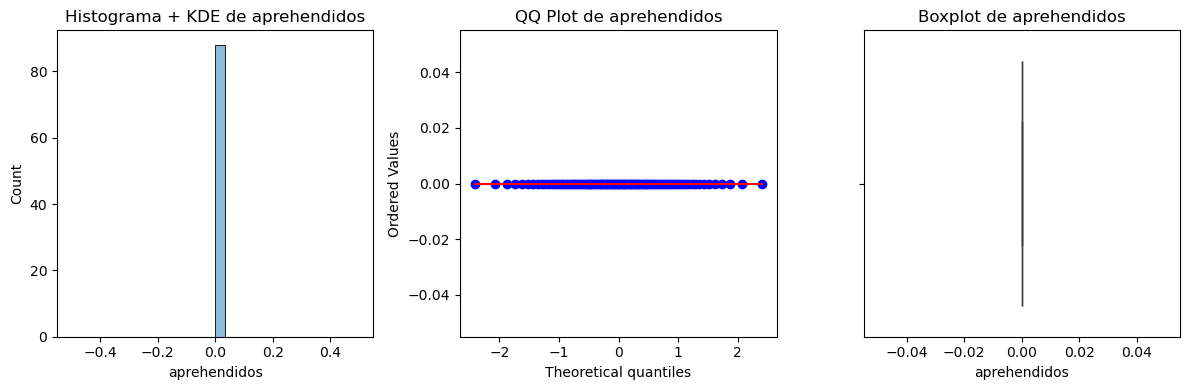

🧪 Shapiro-Wilk test: p-value = 1.00000
🧪 D’Agostino-Pearson test: p-value = nan
🧪 Anderson-Darling stat: nan
    Nivel 15.0%: crítico=0.55300
    Nivel 10.0%: crítico=0.62900
    Nivel 5.0%: crítico=0.75500
    Nivel 2.5%: crítico=0.88100
    Nivel 1.0%: crítico=1.04800


c:\Users\paez\anaconda3\envs\mlflow-env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\paez\anaconda3\envs\mlflow-env\lib\site-packages\scipy\stats\_morestats.py:2248: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


In [ ]:
for col in df_casos.columns:
    if col in ['fecha','observaciones']:
        continue
    print(f"\n📊 Columna: {col}")
    serie = df_casos[col].dropna()
    
    # Histogram + KDE
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True, bins=30)
    plt.title(f"Histograma + KDE de {col}")
    plt.xlabel(col)

    # QQ Plot
    plt.subplot(1, 3, 2)
    probplot(serie, dist="norm", plot=plt)
    plt.title(f"QQ Plot de {col}")

    # Boxplot para ver outliers
    plt.subplot(1, 3, 3)
    sns.boxplot(x=serie)
    plt.title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()

    # Test de Shapiro-Wilk
    if len(serie) >= 3 and len(serie) <= 5000:
        stat, p = shapiro(serie)
        print(f"🧪 Shapiro-Wilk test: p-value = {p:.5f}")
    else:
        print("ℹ️ Shapiro-Wilk no aplicable (requiere entre 3 y 5000 muestras)")
    
    # Test de D'Agostino y Pearson (más robusto)
    try:
        stat, p = normaltest(serie)
        print(f"🧪 D’Agostino-Pearson test: p-value = {p:.5f}")
    except:
        print("⚠️ Error en D’Agostino-Pearson (puede requerir > 20 datos)")
    
    # Anderson-Darling test (devuelve estadístico y umbrales)
    result = anderson(serie)
    print(f"🧪 Anderson-Darling stat: {result.statistic:.5f}")
    for i in range(len(result.critical_values)):
        print(f"    Nivel {result.significance_level[i]}%: crítico={result.critical_values[i]:.5f}")

# Ejercicio 2

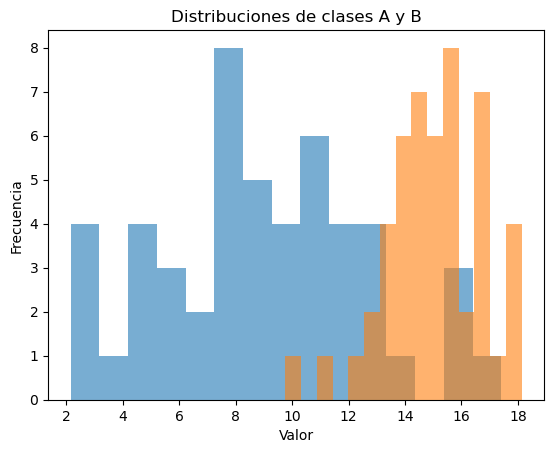

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score, precision_score, f1_score


np.random.seed(42) 

N = 50
media_A, desvio_A = 10, 4
media_B, desvio_B = 15, 2


valores_A = np.random.normal(loc=media_A, scale=desvio_A, size=N)
valores_B = np.random.normal(loc=media_B, scale=desvio_B, size=N)


df = pd.DataFrame({
    'Val.': np.concatenate([valores_A, valores_B]),
    'Etiq.': ['A'] * N + ['B'] * N
})

df['target'] = df['Etiq.'].map({'A': 0, 'B': 1})

plt.hist(valores_A, bins=15, alpha=0.6, label='A')
plt.hist(valores_B, bins=15, alpha=0.6, label='B')
plt.title("Distribuciones de clases A y B")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

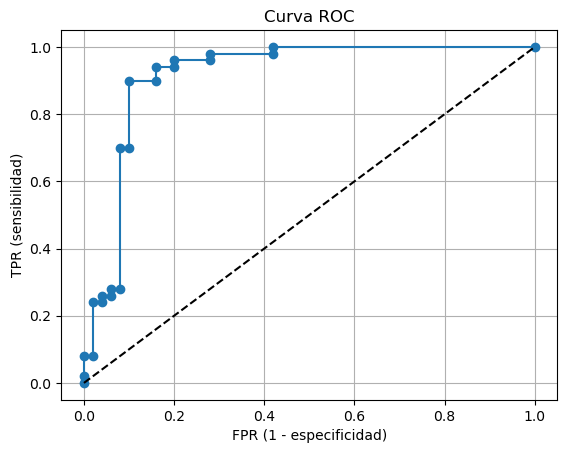

In [3]:

fpr, tpr, thresholds = roc_curve(df['target'], df['Val.'])

plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR (1 - especificidad)')
plt.ylabel('TPR (sensibilidad)')
plt.title('Curva ROC')
plt.grid(True)
plt.show()

In [ ]:
#Umbrales puestos a mano

umbral = 13.3  
df['pred'] = (df['Val.'] >= umbral).astype(int)

accuracy = accuracy_score(df['target'], df['pred'])
precision = precision_score(df['target'], df['pred'])
f1 = f1_score(df['target'], df['pred'])

print(f"Exactitud (accuracy): {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"F1-score: {f1:.2f}")

In [ ]:
#Optimización de valores de umbral
J = tpr - fpr
print(J)
indice_optimo = np.argmax(J)
print(indice_optimo)
umbral_optimo = thresholds[indice_optimo]
print(umbral_optimo)

print(f"Umbral óptimo según Youden: {umbral_optimo:.4f}")
print(f"TPR: {tpr[indice_optimo]:.4f}, FPR: {fpr[indice_optimo]:.4f}")

[0.   0.02 0.08 0.06 0.22 0.2  0.22 0.2  0.22 0.2  0.62 0.6  0.8  0.74
 0.78 0.74 0.76 0.68 0.7  0.56 0.58 0.  ]
12
13.321564953554724
Umbral óptimo según Youden: 13.3216
TPR: 0.9000, FPR: 0.1000


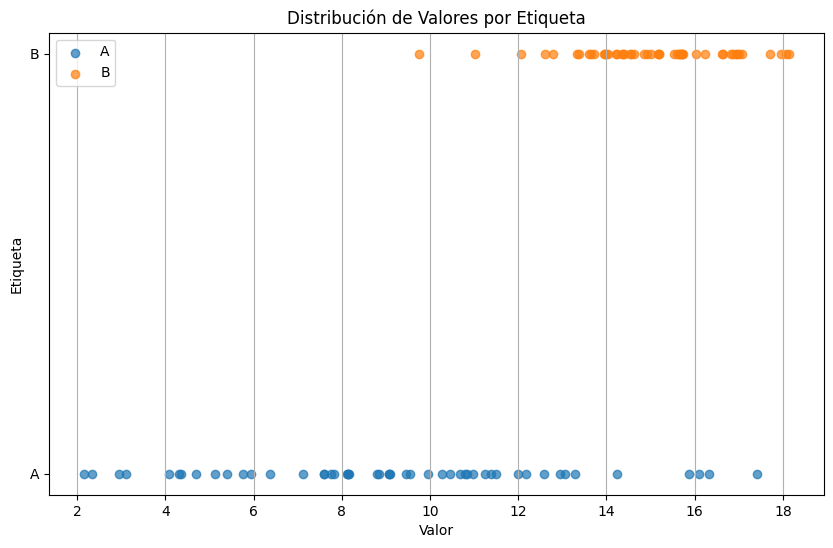

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df[df['Etiq.'] == 'A']['Val.'], df[df['Etiq.'] == 'A']['Etiq.'], label='A', alpha=0.7)
plt.scatter(df[df['Etiq.'] == 'B']['Val.'], df[df['Etiq.'] == 'B']['Etiq.'], label='B', alpha=0.7)

plt.xlabel('Valor')
plt.ylabel('Etiqueta')
plt.title('Distribución de Valores por Etiqueta')
plt.yticks(['A', 'B']) 
plt.legend()
plt.grid(True, axis='x')
plt.show()

Este ejercicio es posible hacerlo no supervisado, aplicando Clustering, K vecinos más cercanos de tal manera de separar en dos categorias los datos.

# Ejercicio 3

In [18]:
np.random.seed(12) 

N = 50
media_A, desvio_A = 10, 2
media_B, desvio_B = 17, 2


valores_A_X = np.random.normal(loc=media_A, scale=desvio_A, size=N)
valores_A_Y = np.random.normal(loc=media_A, scale=desvio_A, size=N)

valores_B_X = np.random.normal(loc=media_B, scale=desvio_B, size=N)
valores_B_Y = np.random.normal(loc=media_B, scale=desvio_B, size=N)

df = pd.DataFrame({
    'grupo': ['A'] * N + ['B'] * N,
    'X': np.concatenate([valores_A_X, valores_B_X]),
    'Y': np.concatenate([valores_A_Y, valores_B_Y])
})


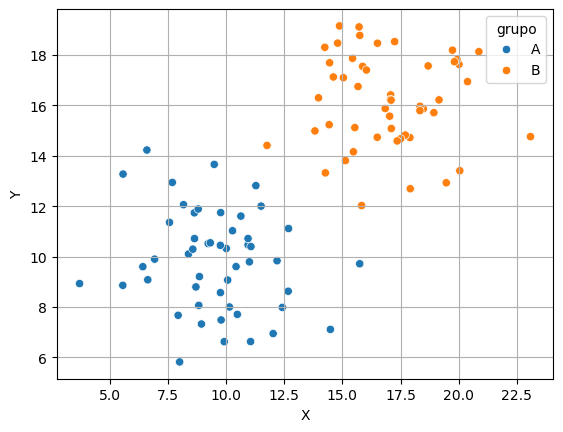

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='X', y='Y', hue='grupo')
plt.grid(True)
plt.show()

Para este caso se podría armar una recta que sea el umbral para una categoría y otra, entonces si comparamos un nuevo punto P=(px,py) y está por debajo del umbral es Categoria A y viceversa es B